**Importing Libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Rainfall weather.csv.crdownload")

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,4128.000000,4135.000000,4079.000000,0.0,0.0,4080.000000,4114.000000,4111.000000,4121.000000,4117.000000,4128.000000,4117.000000,1289.000000,1427.000000,4121.000000,4117.000000
mean,9.994428,22.981306,1.992449,NaN,NaN,33.618873,8.373845,14.641936,74.818733,49.007287,1018.359496,1015.722662,6.391001,5.406447,14.954962,21.627131
std,6.037013,7.394068,6.225151,NaN,NaN,13.226712,6.844936,7.364955,17.169399,19.565679,7.249627,7.078473,2.387684,2.832176,6.118159,7.171184
min,-3.000000,6.800000,0.000000,NaN,NaN,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000
25%,5.100000,16.900000,0.000000,NaN,NaN,24.000000,4.000000,9.000000,62.000000,34.000000,1013.400000,1010.700000,5.000000,2.000000,10.100000,15.800000
50%,9.900000,22.300000,0.000000,NaN,NaN,31.000000,7.000000,13.000000,76.000000,48.000000,1018.400000,1015.700000,8.000000,7.000000,15.000000,20.900000
75%,14.900000,28.600000,0.400000,NaN,NaN,41.000000,11.000000,19.000000,89.000000,61.000000,1023.200000,1020.500000,8.000000,8.000000,19.700000,26.900000
max,28.300000,44.800000,104.200000,NaN,NaN,107.000000,48.000000,50.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,34.500000,43.400000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4150 non-null   object 
 1   Location       4150 non-null   object 
 2   MinTemp        4128 non-null   float64
 3   MaxTemp        4135 non-null   float64
 4   Rainfall       4079 non-null   float64
 5   Evaporation    0 non-null      float64
 6   Sunshine       0 non-null      float64
 7   WindGustDir    4080 non-null   object 
 8   WindGustSpeed  4080 non-null   float64
 9   WindDir9am     3423 non-null   object 
 10  WindDir3pm     4058 non-null   object 
 11  WindSpeed9am   4114 non-null   float64
 12  WindSpeed3pm   4111 non-null   float64
 13  Humidity9am    4121 non-null   float64
 14  Humidity3pm    4117 non-null   float64
 15  Pressure9am    4128 non-null   float64
 16  Pressure3pm    4117 non-null   float64
 17  Cloud9am       1289 non-null   float64
 18  Cloud3pm

In [7]:
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0     2008-12-01         Albury     13.4     22.9       0.6          NaN   
1     2008-12-02         Albury      7.4     25.1       0.0          NaN   
2     2008-12-03         Albury     12.9     25.7       0.0          NaN   
3     2008-12-04         Albury      9.2     28.0       0.0          NaN   
4     2008-12-05         Albury     17.5     32.3       1.0          NaN   
...          ...            ...      ...      ...       ...          ...   
4145  2012-02-10  BadgerysCreek     16.6     26.3      48.2          NaN   
4146  2012-02-11  BadgerysCreek     16.8     25.4       7.0          NaN   
4147  2012-02-12  BadgerysCreek     13.2     27.0       6.6          NaN   
4148  2012-02-13  BadgerysCreek     16.4     26.2       0.2          NaN   
4149  2012-02-14  BadgerysCreek     16.2     26.3       5.2          NaN   

      Sunshine WindGustDi

**Handling Missing Values**

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            22
MaxTemp            15
Rainfall           71
Evaporation      4150
Sunshine         4150
WindGustDir        70
WindGustSpeed      70
WindDir9am        727
WindDir3pm         92
WindSpeed9am       36
WindSpeed3pm       39
Humidity9am        29
Humidity3pm        33
Pressure9am        22
Pressure3pm        33
Cloud9am         2861
Cloud3pm         2723
Temp9am            29
Temp3pm            33
RainToday          72
RainTomorrow       72
dtype: int64

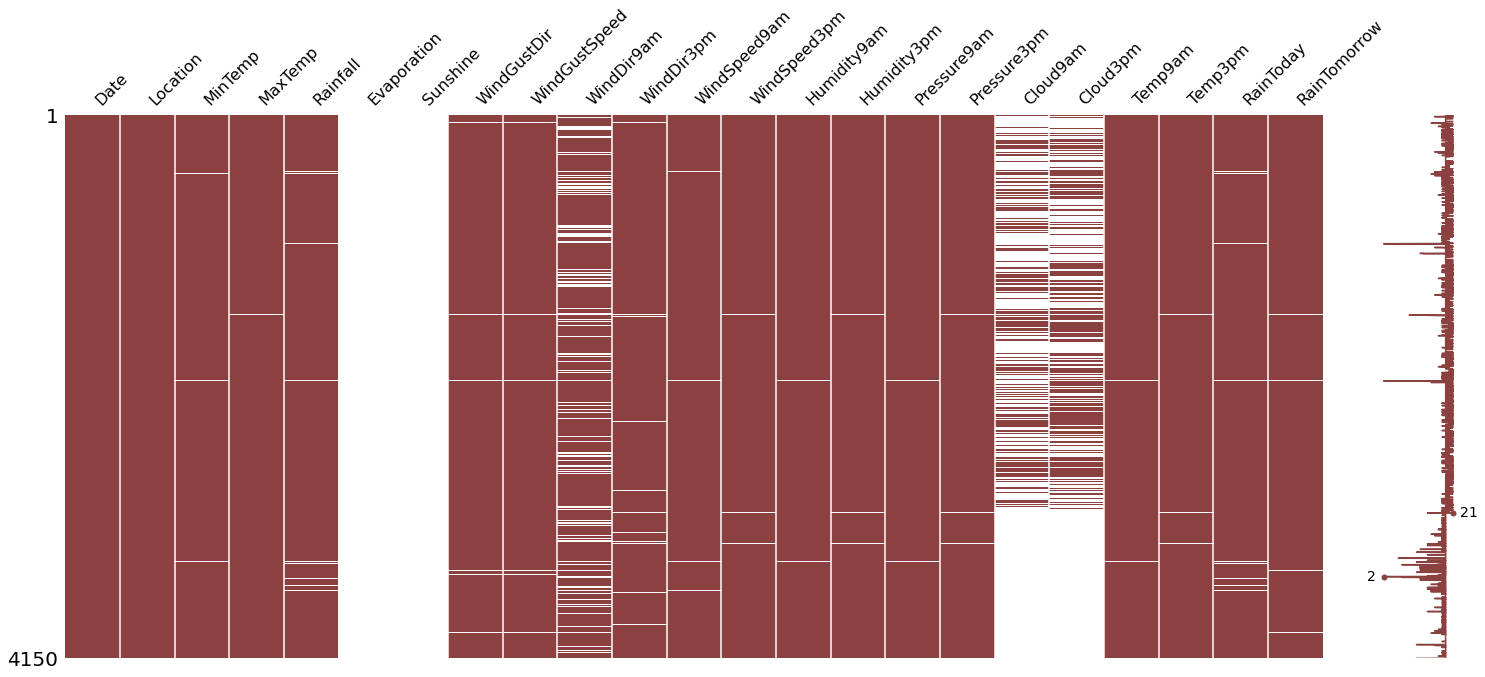

In [10]:
msno.matrix(df,color=(0.55,0.255,0.255),fontsize=16)

In [11]:
df_c=df[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]

In [12]:
df.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
df.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [13]:
c_names=df_c.columns

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df_c=imp_mode.fit_transform(df_c)
df_c=pd.DataFrame(df_c,columns=c_names)

In [16]:
df_c.tail()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
4145,Yes,S,SSE,N
4146,Yes,W,SW,SSW
4147,Yes,WSW,SW,WSW
4148,No,SE,ESE,ESE
4149,No,E,SSE,E


In [17]:
df_c.head()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,No,W,W,WNW
1,No,WNW,NNW,WSW
2,No,WSW,W,WSW
3,No,NE,SE,E
4,No,W,ENE,NW


**Split data into dependent and independent variable**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df = df[df['RainTomorrow'].notnull()]
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)

In [20]:
X=df.drop('RainTomorrow',axis=1)
Y=df['RainTomorrow']


In [21]:
set(Y)

{'No', 'Yes'}

In [23]:
X=X.drop('Date',axis=1)

In [24]:
names=X.columns
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
sc=StandardScaler()

In [26]:
print(len(X),len(Y))

4078 4078


**Encode Label**

In [29]:
from zmq.constants import XPUB_VERBOSE
LE = LabelEncoder()
X['Location'] = LE.fit_transform(X['Location'])
X.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


In [32]:
LE = LabelEncoder()
Y=pd.DataFrame(Y)
Y= LE.fit_transform(Y)
print(len(X),len(Y))

4078 4078


In [33]:
sc=StandardScaler()

In [36]:
X=sc.fit_transform(X)
X[:7]

array([[-0.59528759,  0.56837949, -0.0085919 , -0.22426047,  0.78583207,
         1.6959896 ,  1.2723515 , -0.22201428, -1.37796131, -1.47074286,
        -1.22154605,  0.32115973,  0.02625225],
       [-0.59528759, -0.42682132,  0.28860911, -0.32021537,  0.78583207,
        -0.64056306,  1.00035747, -1.7954242 , -1.22486289, -1.07041563,
        -1.12232734,  0.3701459 ,  0.37441575],
       [-0.59528759,  0.48544609,  0.36966393, -0.32021537,  0.93712123,
         1.54995506,  1.54434552, -2.14507085, -0.96969886, -1.48454725,
        -0.99476042,  0.99063741,  0.22122381],
       [-0.59528759, -0.12826107,  0.68037408, -0.32021537, -0.72705948,
         0.38167873, -0.76760369, -1.73714976, -1.68415815, -0.10410851,
        -0.41362225,  0.51710442,  0.68079963],
       [-0.59528759,  1.24843337,  1.26126698, -0.16029055,  0.55889834,
        -0.20245943,  0.72836345,  0.41900458, -0.81660044, -1.04280686,
        -1.37746117,  0.46811825,  1.12644891],
       [-0.59528759,  0.767419

In [37]:
X=pd.DataFrame(X,columns=names)

**Train and Test the Model** **And** **Model Evaluation**

In [38]:
from sklearn import model_selection

In [57]:
import sklearn.metrics as metrics

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Learning rate set to 0.050311
0:	total: 102ms	remaining: 3m 23s
1:	total: 150ms	remaining: 2m 30s
2:	total: 203ms	remaining: 2m 15s
3:	total: 258ms	remaining: 2m 8s
4:	total: 305ms	remaining: 2m 1s
5:	total: 355ms	remaining: 1m 57s
6:	total: 408ms	remaining: 1m 56s
7:	total: 458ms	remaining: 1m 53s
8:	total: 508ms	remaining: 1m 52s
9:	total: 557ms	remaining: 1m 50s
10:	total: 605ms	remaining: 1m 49s
11:	total: 658ms	remaining: 1m 49s
12:	total: 713ms	remaining: 1m 49s
13:	total: 766ms	remaining: 1m 48s
14:	total: 815ms	remaining: 1m 47s
15:	total: 868ms	remaining: 1m 47s
16:	total: 916ms	remaining: 1m 46s
17:	total: 965ms	remaining: 1m 46s
18:	total: 1.02s	remaining: 1m 46s
19:	total: 1.07s	remaining: 1m 46s
20:	total: 1.12s	remaining: 1m 45s
21:	total: 1.17s	remaining: 1m 45s
22:	total: 1.22s	remaining: 1m 44s
23:	total: 1.27s	rem

In [39]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
RFC=RandomForestClassifier()


In [45]:
GBC=GradientBoostingClassifier()

In [46]:
np.any(np.isnan(X))

True

In [ ]:
Y_pred = cat.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[21459  1258]
 [ 2702  3673]]
0.8638801044960814
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     22717
           1       0.74      0.58      0.65      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



0.7603899161636747

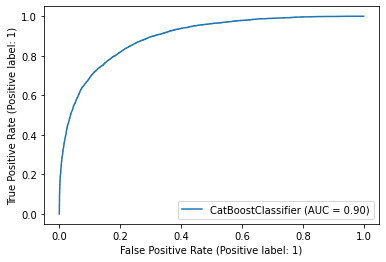

In [ ]:
metrics.plot_roc_curve(cat, X_test, Y_test)
metrics.roc_auc_score(Y_test, Y_pred, average=None) 

In [ ]:
RFC=RandomForestClassifier()
RFC.fit(X_train_res,Y_train_res)

RandomForestClassifier()

In [ ]:
Y_pred1 = rf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred1))
print(accuracy_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))

[[20595  2122]
 [ 2356  4019]]
0.8460745222054173
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     22717
           1       0.65      0.63      0.64      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.77     29092
weighted avg       0.84      0.85      0.85     29092



0.7685105755644689

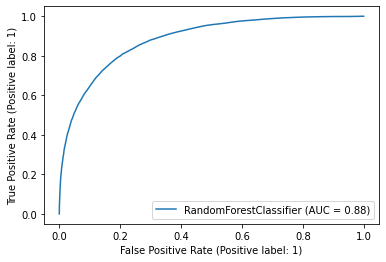

In [ ]:
metrics.plot_roc_curve(rf, X_test, Y_test)
metrics.roc_auc_score(Y_test, Y_pred1, average=None)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, Y_train_res)

LogisticRegression()

In [ ]:
Y_pred2 = logreg.predict(X_test)
print(confusion_matrix(Y_test,Y_pred2))
print(accuracy_score(Y_test,Y_pred2))
print(classification_report(Y_test,Y_pred2))

[[17601  5116]
 [ 1515  4860]]
0.772067922452908
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22717
           1       0.49      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



**Save The Model**

In [55]:
import pickle

In [56]:
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))